# TRAFFIC-SIGNS-CLASSIFICATIONS

Dataset taken from kaggle (https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed)😊
15-16 july 2020 🚀

tried to make it in a more simpilar manner
around 43 different traffic signs 
let me find out that traffic sign for you...😜

made using tensorflow 👀

In [2]:
import matplotlib.pyplot as mlt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import random
import pickle

In [21]:
with open("C:/Users/kumar/Documents/traffic-signs-data/train.pickle", mode='rb') as training_data:
  train = pickle.load(training_data)
with open("C:/Users/kumar/Documents/traffic-signs-data/valid.pickle", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("C:/Users/kumar/Documents/traffic-signs-data/test.pickle", mode='rb') as testing_data:
  test = pickle.load(testing_data)


In [4]:
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [5]:
x_valid.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape


(34799,)

17

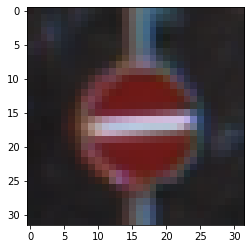

In [7]:
i = np.random.randint(1, len(x_train))
mlt.imshow(x_train[i])
y_train[i]

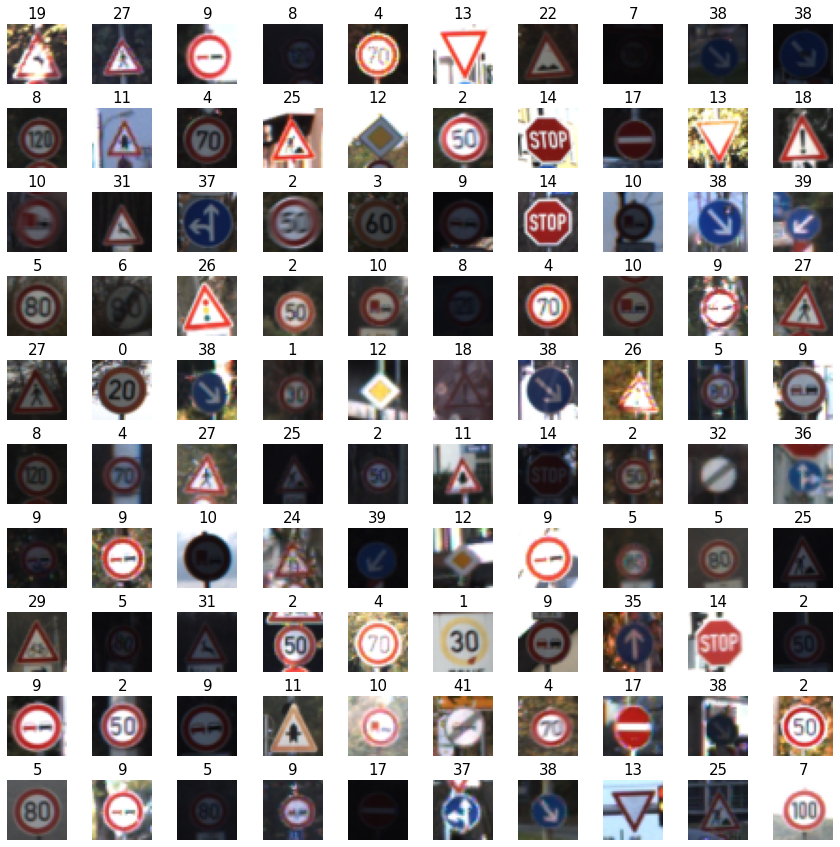

In [8]:
w_grid = 10
l_grid = 10

fig, axes = mlt.subplots(l_grid, w_grid, figsize=(15,15))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid*l_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
mlt.subplots_adjust(hspace = 0.4)

In [9]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [10]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims = True)
x_valid_gray = np.sum(x_valid/3, axis=3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims = True)

In [11]:
x_train_gray

array([[[[ 32.66666667],
         [ 39.66666667],
         [ 43.66666667],
         ...,
         [ 56.        ],
         [ 64.33333333],
         [ 63.66666667]],

        [[ 34.33333333],
         [ 40.66666667],
         [ 44.        ],
         ...,
         [ 54.33333333],
         [ 61.66666667],
         [ 56.33333333]],

        [[ 33.        ],
         [ 38.33333333],
         [ 43.33333333],
         ...,
         [ 52.33333333],
         [ 53.33333333],
         [ 49.        ]],

        ...,

        [[ 62.        ],
         [ 56.66666667],
         [ 46.33333333],
         ...,
         [ 35.66666667],
         [ 60.        ],
         [ 84.33333333]],

        [[ 64.        ],
         [ 97.        ],
         [ 88.33333333],
         ...,
         [ 39.        ],
         [ 51.33333333],
         [ 62.66666667]],

        [[ 56.66666667],
         [ 77.        ],
         [ 87.        ],
         ...,
         [ 48.66666667],
         [ 47.66666667],
         [ 50.666

In [12]:
x_train_gray.shape

(34799, 32, 32, 1)

In [13]:
#normal form
x_train_gray_normal = (x_train_gray - 128)/128
x_valid_gray_normal = (x_train_gray - 128)/128
x_test_gray_normal = (x_train_gray - 128)/128

In [14]:
x_train_gray_normal


array([[[[-0.74479167],
         [-0.69010417],
         [-0.65885417],
         ...,
         [-0.5625    ],
         [-0.49739583],
         [-0.50260417]],

        [[-0.73177083],
         [-0.68229167],
         [-0.65625   ],
         ...,
         [-0.57552083],
         [-0.51822917],
         [-0.55989583]],

        [[-0.7421875 ],
         [-0.70052083],
         [-0.66145833],
         ...,
         [-0.59114583],
         [-0.58333333],
         [-0.6171875 ]],

        ...,

        [[-0.515625  ],
         [-0.55729167],
         [-0.63802083],
         ...,
         [-0.72135417],
         [-0.53125   ],
         [-0.34114583]],

        [[-0.5       ],
         [-0.2421875 ],
         [-0.30989583],
         ...,
         [-0.6953125 ],
         [-0.59895833],
         [-0.51041667]],

        [[-0.55729167],
         [-0.3984375 ],
         [-0.3203125 ],
         ...,
         [-0.61979167],
         [-0.62760417],
         [-0.60416667]]],


       [[[ 0.12239583],


In [15]:

x_valid_gray_normal.shape



(34799, 32, 32, 1)

<Figure size 432x288 with 0 Axes>

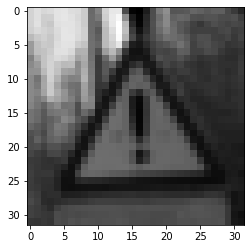

<Figure size 432x288 with 0 Axes>

In [16]:
i = random.randint(1, len(x_train_gray_normal))
mlt.imshow(x_train_gray_normal[i].squeeze(), cmap='gray')
mlt.figure()

In [17]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()
CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43 , activation = 'softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [18]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = CNN.fit(x_train_gray_normal,
                 y_train,
                 batch_size = 500,
                 epochs = 25,
                 verbose = 1,
                 validation_data = (x_valid_gray_normal, y_valid))

Train on 34799 samples, validate on 34799 samples
Epoch 1/25
34799/34799 [==============================] - 22s 618us/sample - loss: 0.6338 - accuracy: 0.8153 - val_loss: 13.5690 - val_accuracy: 0.0365
Epoch 2/25
34799/34799 [==============================] - 21s 614us/sample - loss: 0.5407 - accuracy: 0.8424 - val_loss: 14.7260 - val_accuracy: 0.0371
Epoch 3/25
34799/34799 [==============================] - 21s 616us/sample - loss: 0.4741 - accuracy: 0.8621 - val_loss: 15.7200 - val_accuracy: 0.0369
Epoch 4/25
34799/34799 [==============================] - 22s 618us/sample - loss: 0.4176 - accuracy: 0.8804 - val_loss: 16.4776 - val_accuracy: 0.0365
Epoch 5/25
34799/34799 [==============================] - 21s 615us/sample - loss: 0.3722 - accuracy: 0.8922 - val_loss: 17.0797 - val_accuracy: 0.0364
Epoch 6/25
34799/34799 [==============================] - 21s 615us/sample - loss: 0.3391 - accuracy: 0.9013 - val_loss: 18.0119 - val_accuracy: 0.0367
Epoch 7/25
34799/34799 [==============

Acurracy of 97% 😁